In [3]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [18]:
#Read in Data

batfecal_nt = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batfecal_nt.rds")
batoral_nt = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batoral_nt.rds")
batskin_nt = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batskin_nt.rds")

bats_all_nt = merge_phyloseq(batfecal_nt, batoral_nt, batskin_nt)

### Shannon Diversity Calculations

In [ ]:
sample_tab = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Metadata_files/FullMetaData_Bat_All.csv")

In [38]:
sha = estimate_richness(bats_all_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("SampleType") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("SampleType")

In [39]:
stats = dfsha %>%
    group_by(SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(mean))
stats

SampleType,median,mean,sd,sem
FecalFTA,1.370705,1.468401,0.8347025,0.04163118
TongueEtOH,1.424759,1.480435,0.9751766,0.05029089
SkinEtOH,4.393678,4.238442,0.9462185,0.04421388


In [40]:
write.csv(stats, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/shannon_SampleType.csv")

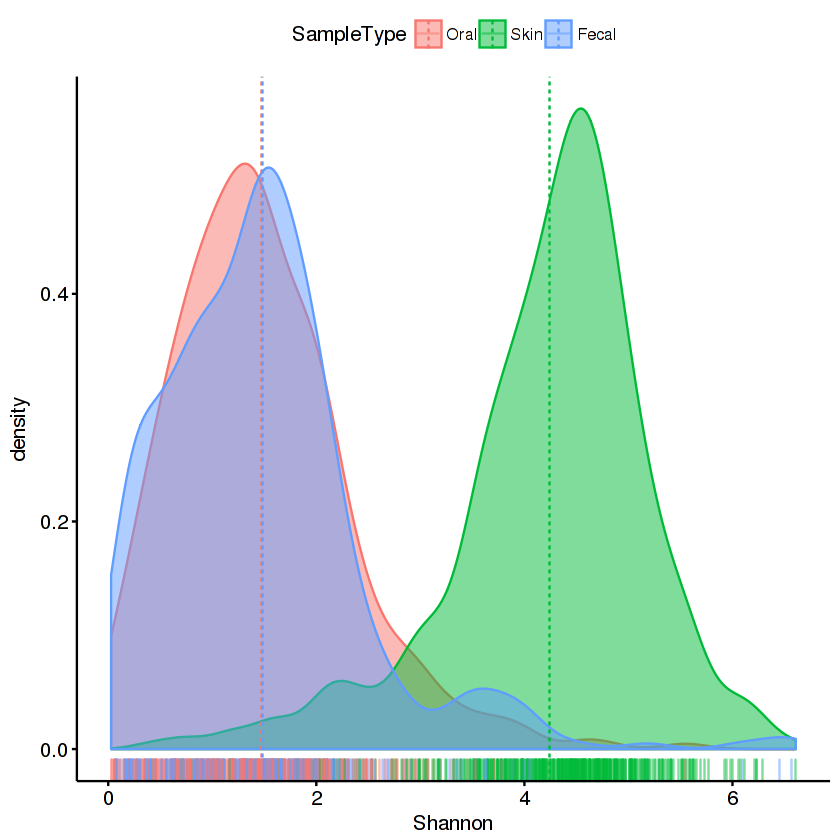

In [41]:
dfsha$SampleType <- factor(
     dfsha$SampleType, 
     labels=c('Oral','Skin','Fecal'))

dfsha_density = ggdensity(dfsha, x = "Shannon", color = "SampleType", fill= "SampleType", rug=TRUE, add="mean")
    
#dfsha_density = dfsha_density + facet_wrap("SampleType")

dfsha_density

In [ ]:
saveRDS(dfsha_density, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/dfsha_density.rds")

### Chao1 Diversity Calculations

In [9]:
sample_tab = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Metadata_files/FullMetaData_Bat_All.csv")

In [42]:
chao = estimate_richness(bats_all_nt, split = TRUE, measures = "Chao1")
chao$SampleID = rownames(chao)

dfchao = merge(chao, sample_tab, on="SampleID")

ordchao = chao %>% group_by("SampleType") %>%
    summarize(med.chao = median("Chao1")) %>%
    arrange(desc(med.chao)) %>%
    magrittr::extract2("SampleType")

In [43]:
stats = dfchao %>%
    group_by(SampleType) %>%
    summarize(median = median(Chao1), 
              mean = mean(Chao1),
              sd = sd(Chao1),
              sem = sd(Chao1/sqrt(length(Chao1)))) %>%
    arrange(-desc(mean))
stats

SampleType,median,mean,sd,sem
FecalFTA,49.03125,68.80383,69.63866,3.473261
TongueEtOH,49.00000,93.94940,211.20528,10.892081
SkinEtOH,387.88725,517.57477,378.67052,17.694111


In [44]:
write.csv(stats, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/chao1_SampleType.csv")

In [ ]:
p = ggplot(na.omit(dfchao), aes(x = Host_Genus, y = Chao1)) + ggtitle("Bat Oral - Chao1 Diversity") 


p = p + geom_boxplot() + ylab("Chao1")  + coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 100))

#p = p + scale_y_continuous(limits = c(0, 100))

p = p + geom_point(size = .3, aes(color = Locality),  
                   position = position_jitter(h = 0, w = 0.1))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

### Observed Diversity Calculations

In [55]:
obs = estimate_richness(bats_all_nt, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("SampleType") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("SampleType")

In [56]:
stats = dfobs %>%
    group_by(SampleType) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(mean))
stats

SampleType,median,mean,sd,sem
FecalFTA,49,68.62687,69.23645,3.45320
TongueEtOH,49,93.34309,207.32230,10.69183
SkinEtOH,386,512.70961,372.16292,17.39003


In [57]:
write.csv(stats, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/observed_SampleType.csv")

#### Plotting observed diversity, with sorting

In [ ]:
x$name <- factor(x$name, levels = x$name[order(x$val)])

In [ ]:
avg_obs <- aggregate(Observed ~ SampleType, data = dfobs, mean)

In [ ]:
dfobs$SampleType <-factor(dfobs$SampleType, levels=avg_obs[order(avg_obs$Observed), "SampleType"])

In [ ]:
# BOX PLOT

#dfobs$SampleType <- factor(dfobs$SampleType, levels = dfobs$SampleID[order(dfobs$Observed)])



p = ggplot(na.omit(dfobs), aes(x = SampleType, y = Observed)) + ggtitle("Bat Skin Microbiome - Observed Diversity")
#p = p + scale_y_continuous(0,2000)

p = p + geom_boxplot() + ylab("# of Observed OTUs") #+ coord_flip()

p = p + geom_point(size = .75, aes(color = SampleType),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + scale_color_manual(values=c("#9999CC","#CC6666", "#66CC99"))

#p = p + geom_point(size = .75, position = position_jitter(h = 0, w = 0.2))


p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

In [ ]:
# DENSITY PLOT

dfobs$SampleType <- factor(
     dfobs$SampleType, 
     labels=c('Fecal','Skin','Oral'))

p = ggdensity(dfobs, x = "Observed", color = "SampleType", fill= "SampleType", rug=TRUE)
    
#p = p + facet_wrap("SampleType")

p

##### STATS FOR DIVERSITY MEASURES

In [ ]:
stats.krusk = kruskal.test(Observed~SampleType, data=dfobs)
stats.krusk

In [ ]:
pairwise.wilcox.test(dfsha$Shannon, dfsha$SampleType,p.adjust.method="bonf")

In [ ]:
dunn = dunn.test(dfobs$Observed, g=dfobs$Observed, method="bonferroni")

In [ ]:
stats.aov2 = oneway.test(Shannon~SampleType, data=dfsha, var.equal=TRUE)
stats.aov2

In [102]:
#SCRAPS

pip_1 = batfecal_nt
pip_1
hostdata.test = sample_data(pip_1)
write.csv(hostdata.test, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/hostdata.test.csv")


#pip_2 = subset_samples(batoral_nt, Host_species=="africanus")
#pip_2
#pip_3 = subset_samples(batskin_nt, Host_species=="africanus")
#pip_3

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 37643 taxa and 402 samples ]
sample_data() Sample Data:       [ 402 samples by 47 sample variables ]
tax_table()   Taxonomy Table:    [ 37643 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 37643 tips and 37641 internal nodes ]